

> ## **California Housing Prices Prediction - Machine Learning**



### Exploratory Data Analysis (EDA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Using pandas for Data Analysis and Data Manipulation
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/housing.csv")

In [3]:
#Examining first 10 values of all features
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [4]:
#Examining last 10 values of all features
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20630,-121.32,39.29,11,2640,505.0,1257,445,3.5673,INLAND,112000
20631,-121.40,39.33,15,2655,493.0,1200,432,3.5179,INLAND,107200
20632,-121.45,39.26,15,2319,416.0,1047,385,3.1250,INLAND,115600
20633,-121.53,39.19,27,2080,412.0,1082,382,2.5495,INLAND,98300
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,INLAND,116800
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [5]:
#Checking number of rows and columns (m*n)
df.shape

(20640, 10)

In [6]:
#Feature names listed
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
#25%, 75%, standard deviaiton etc are displayed for all features
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#To check non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
#Using matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

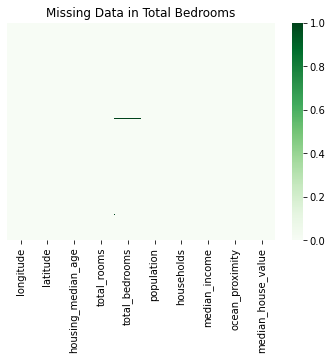

In [10]:
#Visualizing missing data
sns.heatmap(df.isnull(),cmap='Greens',cbar=True,yticklabels=False)
plt.title('Missing Data in Total Bedrooms')
plt.show()

In [11]:
#Checking as to which feature has missing values using boolean commands
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [12]:
#So, total_bedrooms has missing values
#Counting how many rows do not have bedrooms 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

<b>We have 207 missing values for 'total_bedrooms' which will be handled during the next phase

### Data Cleaning, Visualization, Feature Engineering and Selection

In [13]:
#Another version of df.head() but without feature names
df.values

array([[-122.23, 37.88, 41, ..., 8.3252, 'NEAR BAY', 452600],
       [-122.22, 37.86, 21, ..., 8.3014, 'NEAR BAY', 358500],
       [-122.24, 37.85, 52, ..., 7.2574, 'NEAR BAY', 352100],
       ...,
       [-121.22, 39.43, 17, ..., 1.7, 'INLAND', 92300],
       [-121.32, 39.43, 18, ..., 1.8672, 'INLAND', 84700],
       [-121.24, 39.37, 16, ..., 2.3886, 'INLAND', 89400]], dtype=object)

In [14]:
# Shuffling all rows(frac=1)
df = df.sample(frac=1)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14458,-117.27,32.82,42,2820,488.0,1175,500,4.5083,NEAR OCEAN,405200
9596,-120.45,37.31,20,4379,753.0,2055,716,3.7652,INLAND,133500
15900,-122.41,37.74,38,1754,382.0,928,354,4.1417,NEAR BAY,270800
3158,-118.95,35.26,24,1341,214.0,667,184,4.0000,INLAND,94500
8534,-118.36,33.90,41,1355,349.0,655,329,2.9551,<1H OCEAN,205000
6265,-117.94,34.05,34,1729,324.0,1341,324,3.7708,<1H OCEAN,163500
12543,-121.50,38.54,52,1145,133.0,334,138,8.3380,INLAND,405800
10594,-117.79,33.69,16,1532,240.0,679,248,5.7115,<1H OCEAN,313900
13305,-117.62,34.09,26,3271,595.0,2259,566,4.0139,INLAND,132000
7783,-118.06,33.91,36,1360,271.0,909,275,4.6731,<1H OCEAN,173300


In [15]:
#Categorical Data, so, will enumerate and replace all data with unique values for each type of data
df['ocean_proximity'].unique()

array(['NEAR OCEAN', 'INLAND', 'NEAR BAY', '<1H OCEAN', 'ISLAND'],
      dtype=object)

[]

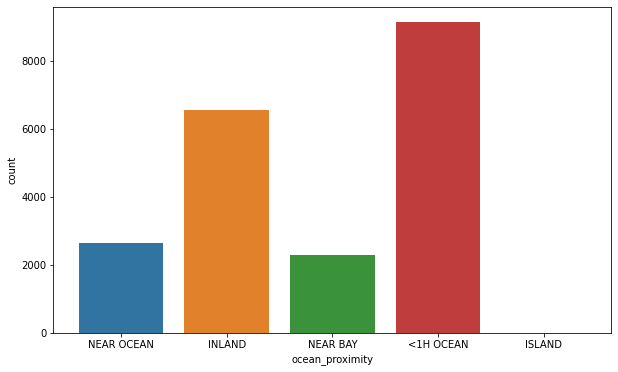

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

In [17]:
# Replace ocean proximity with values to help our model
ocean_proximity = {a:b for b,a in enumerate(df['ocean_proximity'].unique())}
df.replace(ocean_proximity, inplace=True)

In [18]:
df.ocean_proximity.unique()

array([0, 1, 2, 3, 4])

In [19]:
# The feature 'total_bedrooms' has NaN values so I will replace them with the mean of the feature
df = df.apply(lambda x: x.fillna(x.mean()))

In [20]:
#Run this cell to check if mean values are populated into the csv. 
#Note that data frame has been shuffled
#new=df.to_csv("total_bedrooms".csv")

In [21]:
#Verifying Data is balanced
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

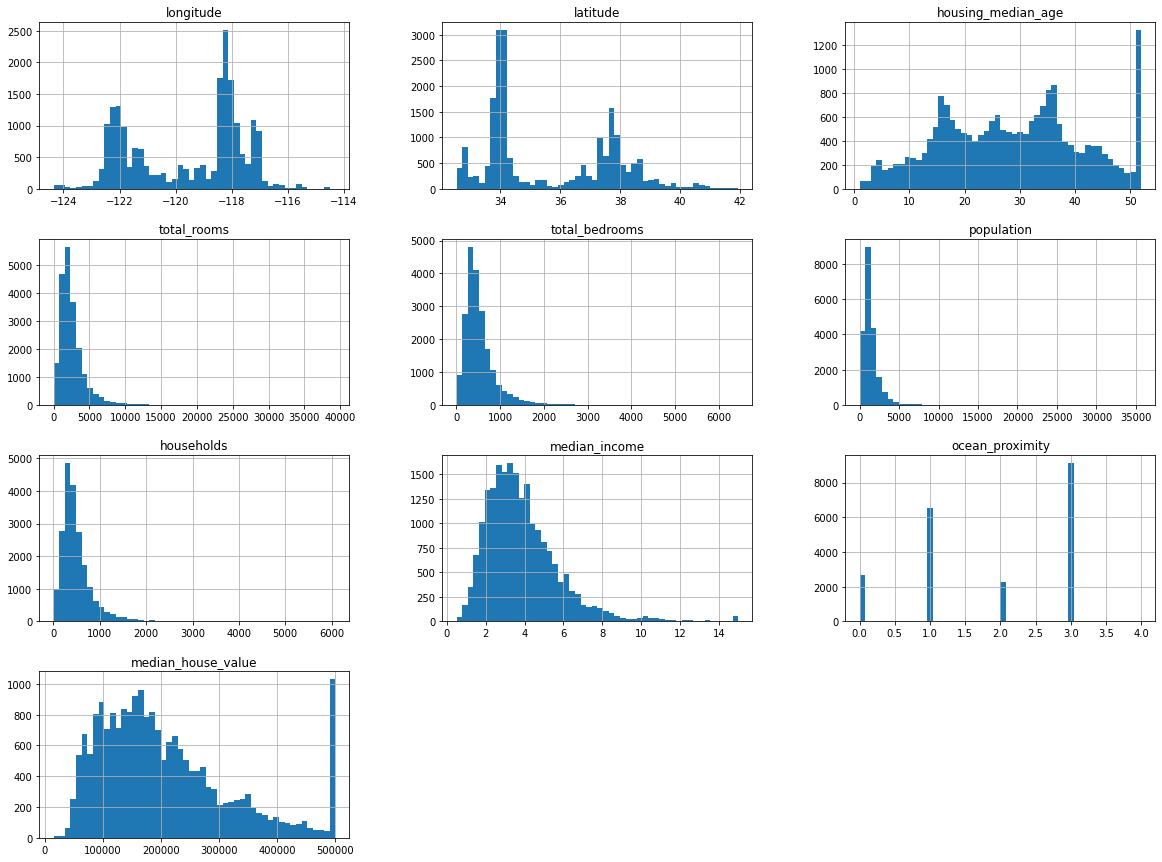

In [22]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

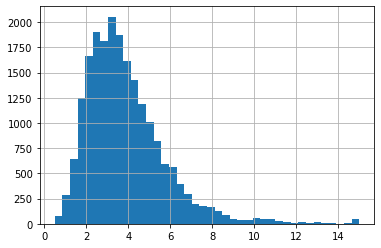

In [23]:
#Analyzing the median income range
df["median_income"].hist(bins=40)

In [24]:
# Calculating correlation
corr_matrix=df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,0.138310,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.248005,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105795,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,-0.006704,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.010211,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,0.055833,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.033858,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.156712,0.688075
ocean_proximity,0.138310,-0.248005,0.105795,-0.006704,0.010211,0.055833,0.033858,0.156712,1.000000,0.230708
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,0.230708,1.000000


<Figure size 720x432 with 0 Axes>

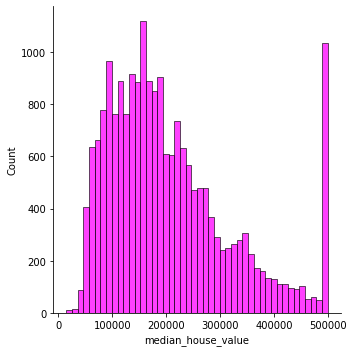

In [25]:
plt.figure(figsize=(10,6))
sns.displot(df['median_house_value'],color='magenta')
plt.show()

As we see from above data, house values > 500000 are outliers, so we remove them

In [26]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001    965
500000     27
475000      8
483300      6
466700      4
Name: median_house_value, dtype: int64

In [27]:
df=df.loc[df['median_house_value']<500001,:]

In [28]:
df=df[df['population']<25000]

<Figure size 1008x576 with 0 Axes>

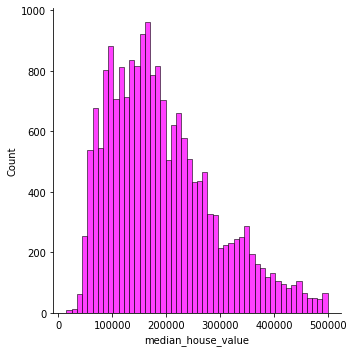

In [29]:
plt.figure(figsize=(14,8))
sns.displot(df['median_house_value'],color='magenta')
plt.show()

<b>The outliers of median house value >500000 are removed

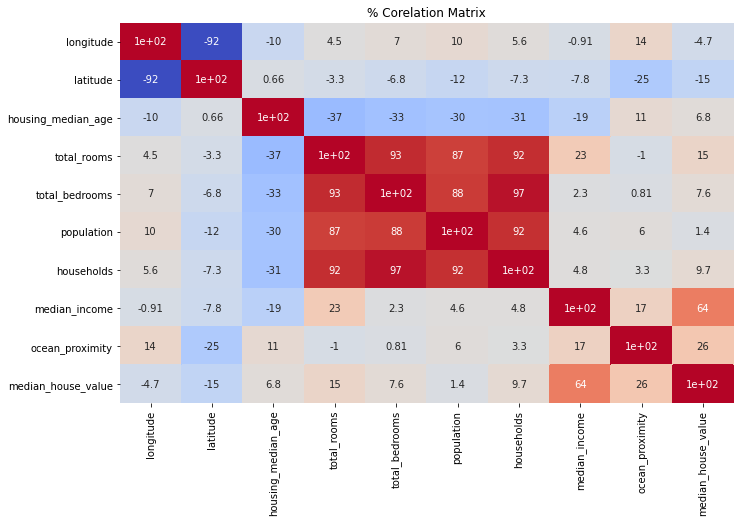

In [30]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

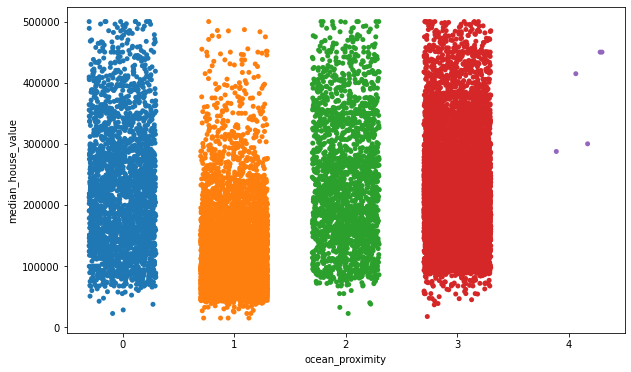

In [31]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.3)

[]

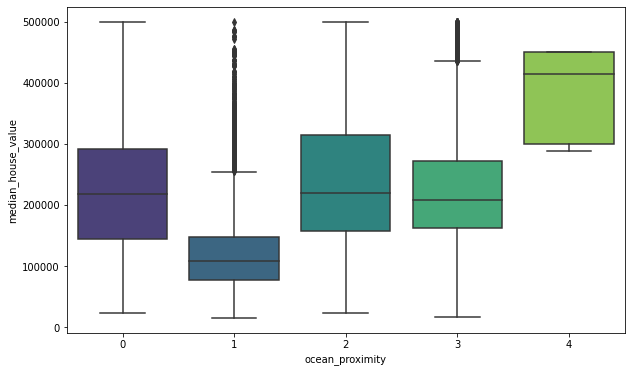

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

### Modelling and Evaluation

In [33]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [34]:
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14458,-117.27,32.82,42,2820,488.0,1175,500,4.5083,0
9596,-120.45,37.31,20,4379,753.0,2055,716,3.7652,1
15900,-122.41,37.74,38,1754,382.0,928,354,4.1417,2
3158,-118.95,35.26,24,1341,214.0,667,184,4.0000,1
8534,-118.36,33.90,41,1355,349.0,655,329,2.9551,3
6265,-117.94,34.05,34,1729,324.0,1341,324,3.7708,3
12543,-121.50,38.54,52,1145,133.0,334,138,8.3380,1
10594,-117.79,33.69,16,1532,240.0,679,248,5.7115,3
13305,-117.62,34.09,26,3271,595.0,2259,566,4.0139,1
7783,-118.06,33.91,36,1360,271.0,909,275,4.6731,3


In [35]:
X.shape

(19673, 9)

In [36]:
y.head(10)

14458    405200
9596     133500
15900    270800
3158      94500
8534     205000
6265     163500
12543    405800
10594    313900
13305    132000
7783     173300
Name: median_house_value, dtype: int64

In [37]:
y.shape

(19673,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [39]:
print("X_train shape is ",X_train.shape)
print("X_test shape is ",X_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (11803, 9)
X_test shape is  (7870, 9)
y_train shape is  (11803,)
y_test shape is  (7870,)


### 1. Random Forest Regressor

In [40]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracies = {}

accuracy = rf.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Random Forest'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Random Forest Regressor is ", accuracy_rounded,'%')


R2 score is  0.7837947896960871

Adjusted R2 score is  0.7529083310812423

Mean Absolute Error is 30755.39

Mean Squared Error is 2044243774.62

Root Mean Squared Error is 45213.31

Accuracy of Random Forest Regressor is  78.38 %


### 2. Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Decision Tree'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,dt.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,dt.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(metrics.mean_squared_error(y_test,dt.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Decision Tree Regressor is ", accuracy_rounded,'%')


R2 score is  0.5537065281004334

Adjusted R2 score is  0.48995031782906673

Mean Absolute Error is 43264.88

Mean Squared Error is 4219753308.92

Root Mean Squared Error is 64959.63

Accuracy of Decision Tree Regressor is  55.37 %


### 3. AdaBoost Regressor

In [43]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=0)

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

accuracy = ada.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['AdaBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,ada.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,ada.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,ada.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of AdaBoost Regressor is ", accuracy_rounded,'%')


R2 score is  0.20110647540746884

Adjusted R2 score is  0.0869788290371073

Mean Absolute Error is 75922.71

Mean Squared Error is 7553625150.57

Root Mean Squared Error is 86911.59

Accuracy of AdaBoost Regressor is  20.11 %


### 4. XGBoost Regressor

In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

accuracy = xg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['XGBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,xg.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,xg.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,xg.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of XGBoost Regressor is ", accuracy_rounded,'%')

[11:04:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

R2 score is  0.738357306767532

Adjusted R2 score is  0.7009797791628937

Mean Absolute Error is 35743.59

Mean Squared Error is 2473860116.8

Root Mean Squared Error is 49737.91

Accuracy of XGBoost Regressor is  73.84 %


### 5. Gradient Boost Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor(random_state=42)

gboost.fit(X_train,y_train)

y_pred = gboost.predict(X_test)

accuracy = gboost.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Gradient Boost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,gboost.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,gboost.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,gboost.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Gradient Boost Regressor is ", accuracy_rounded,'%')


R2 score is  0.7366400100662693

Adjusted R2 score is  0.6990171543614507

Mean Absolute Error is 35906.32

Mean Squared Error is 2490097343.86

Root Mean Squared Error is 49900.88

Accuracy of Gradient Boost Regressor is  73.66 %


### 6. Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.1)

rid.fit(X_train,y_train)

y_pred = rid.predict(X_test)

accuracy = rid.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Ridge Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rid.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rid.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rid.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Ridge Regression is ", accuracy_rounded,'%')


R2 score is  0.6124896281870307

Adjusted R2 score is  0.5571310036423207

Mean Absolute Error is 45375.67

Mean Squared Error is 3663952705.24

Root Mean Squared Error is 60530.59

Accuracy of Ridge Regression is  61.25 %


### 7. Lasso Regression

In [47]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.3)

lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

accuracy = lasso.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Lasso Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,lasso.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,lasso.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Lasso Regression is ", accuracy_rounded,'%')


R2 score is  0.6124895997798621

Adjusted R2 score is  0.5571309711769852

Mean Absolute Error is 45375.68

Mean Squared Error is 3663952973.84

Root Mean Squared Error is 60530.6

Accuracy of Lasso Regression is  61.25 %


### 8. ElasticNet Regression

In [48]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(random_state=0)

ela.fit(X_train,y_train)

y_pred = ela.predict(X_test)

accuracy = ela.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Elastic Net Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,ela.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,ela.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,ela.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Elastic net Regression is ", accuracy_rounded,'%')


R2 score is  0.5628022935714793

Adjusted R2 score is  0.5003454783674048

Mean Absolute Error is 48826.61

Mean Squared Error is 4133751857.27

Root Mean Squared Error is 64294.26

Accuracy of Elastic net Regression is  56.28 %


### 9. CatBoost

In [49]:
!pip install catboost

     |████████████████████████████████| 67.3MB 74kB/s 


In [50]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()

cat.fit(X_train,y_train)

y_pred = cat.predict(X_test)

accuracy = cat.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['CatBoost'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,cat.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,cat.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,cat.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of CatBoost is ", accuracy_rounded,'%')

Learning rate set to 0.060564
0:	learn: 95034.1139863	total: 52ms	remaining: 52s
1:	learn: 92196.1383964	total: 56.4ms	remaining: 28.1s
2:	learn: 89482.3600539	total: 60.9ms	remaining: 20.3s
3:	learn: 87099.9565484	total: 65.1ms	remaining: 16.2s
4:	learn: 84877.7962550	total: 69.4ms	remaining: 13.8s
5:	learn: 82878.3941942	total: 73.7ms	remaining: 12.2s
6:	learn: 81248.3772965	total: 78.1ms	remaining: 11.1s
7:	learn: 79457.0643191	total: 82.5ms	remaining: 10.2s
8:	learn: 77860.5088052	total: 86.8ms	remaining: 9.56s
9:	learn: 76431.9249367	total: 91.3ms	remaining: 9.04s
10:	learn: 75099.2194767	total: 95.7ms	remaining: 8.6s
11:	learn: 73792.9965473	total: 100ms	remaining: 8.23s
12:	learn: 72722.9697250	total: 104ms	remaining: 7.92s
13:	learn: 71684.6188514	total: 109ms	remaining: 7.64s
14:	learn: 70677.1135417	total: 113ms	remaining: 7.42s
15:	learn: 69786.4983844	total: 117ms	remaining: 7.21s
16:	learn: 69011.9095628	total: 122ms	remaining: 7.03s
17:	learn: 68201.9112591	total: 126ms	r

### 10. Light GBM

In [51]:
!pip install lightgbm

In [52]:
import lightgbm as lgb

lg = lgb.LGBMRegressor()

lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)

accuracy = lg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Light GBM'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,lg.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,lg.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,lg.predict(X_test))),2))

print(color.BOLD + "\nAccuracy of Light GBM is ", accuracy_rounded,'%')


R2 score is  0.805094045362777

Adjusted R2 score is  0.7772503375574593

Mean Absolute Error is 29596.6

Mean Squared Error is 1842856996.11

Root Mean Squared Error is 42928.51

Accuracy of Light GBM is  80.51 %


In [53]:
#Verifying how untuned models predict house value
print('\nPrediction of Random Forest is ',rf.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))      
print('\nPrediction of Ada Boost is ',ada.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]])) 
print('\nPrediction of Gradient Boost is ',gboost.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Ridge Regression is ',rid.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Lasso Regression is ',lasso.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Elasticnet Regression is ',ela.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Decision Tree is ',dt.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of CatBoost is ',cat.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Light GBM is ',lg.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))


Prediction of Random Forest is  [420011.]

Prediction of Ada Boost is  [337686.50793651]

Prediction of Gradient Boost is  [419323.72748761]

Prediction of Ridge Regression is  [399244.39943811]

Prediction of Lasso Regression is  [399244.9694864]

Prediction of Elasticnet Regression is  [370978.36071406]

Prediction of Decision Tree is  [361400.]

Prediction of CatBoost is  [472459.68824591]

Prediction of Light GBM is  [430758.97756016]


### All accuracies together

In [54]:
accuracies

{'AdaBoost': 20.11,
 'CatBoost': 81.72,
 'Decision Tree': 55.37,
 'Elastic Net Regression': 56.28,
 'Gradient Boost': 73.66,
 'Lasso Regression': 61.25,
 'Light GBM': 80.51,
 'Random Forest': 78.38,
 'Ridge Regression': 61.25,
 'XGBoost': 73.84}

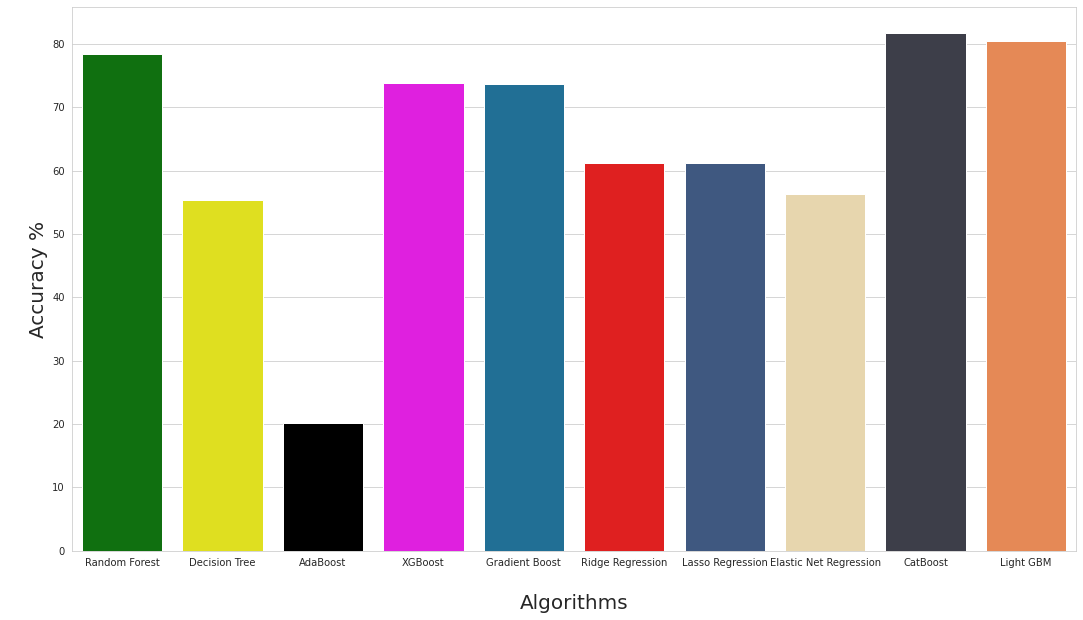

In [55]:
#Plotting accuracies of all the models
colors = ["green", "yellow", "black", "magenta", "#0e76a8", "red", "#34558b","#f0daa4","#3b3d4b","#fd823e"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("\nAccuracy %",fontsize=20)
plt.xlabel("\nAlgorithms",fontsize=20)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [56]:
#CatBoost performs the best without tuning.

### Hyperparameter Tuning


> Let's try to increase the accuracy of the top performing models on this dataset - 

> 1.   XGBoost
2.   CatBoost
1.   LightGBM

---



In [57]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

### XGBoost Tuning

In [58]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 5)]

max_features = ['auto', 'log2', 'sqrt']

max_depth = [int(x) for x in np.linspace(6, 100, num = 6)] 

max_depth.append(None)

bootstrap = [True, False]

grid = {  'n_estimators': n_estimators,

          'max_features': max_features,

          'max_depth': max_depth,

          'bootstrap': bootstrap,

          'C': [1.1, 5.4, 170, 1001],

          'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05, 8, 0.2, 3, 2, 7],

          'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5],

          'loss' : ['mae','mse'],

          'penalty' : ['l1', 'l2', 'elasticnet'],

          'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000],

          'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.15, 0.18, 0.3, 0.5, 0.7]
        
       }

print(grid)

{'n_estimators': [10, 32, 55, 77, 100], 'max_features': ['auto', 'log2', 'sqrt'], 'max_depth': [6, 24, 43, 62, 81, 100, None], 'bootstrap': [True, False], 'C': [1.1, 5.4, 170, 1001], 'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05, 8, 0.2, 3, 2, 7], 'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5], 'loss': ['mae', 'mse'], 'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.18, 0.3, 0.5, 0.7]}


In [59]:
rscv = RandomizedSearchCV(      estimator=xg, 
                                param_distributions=grid, 
                                n_iter = 7, 
                                scoring='r2',
                                cv = 5, 
                                verbose=2, 
                                random_state=42,
                                n_jobs=-1,
                                return_train_score=True)

rscv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.4min finished


[11:05:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'gamma': [0.7001, 0.008, 0.001, 3.1, 1,
                                                  1.3, 5],
                                        'learning

In [60]:
# summarize result
print(rscv.best_params_)
print(rscv.score(X_test , y_test))

{'penalty': 'l1', 'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'mae', 'learning_rate': 0.1, 'gamma': 3.1, 'epsilon': 0.05, 'bootstrap': True, 'alpha': 1000, 'C': 5.4}
0.7938645142994412


In [61]:
#Predict on test data
y_pred = rscv.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rscv.predict(X_test))),2))


R2 score is  0.79

Adjusted R2 score is  0.76

Mean Absolute Error is 30315.77

Mean Squared Error is 1949033433.47

Root Mean Squared Error is 44147.86


In [62]:
#Grid Search CV

# define model
xg = XGBRegressor()

# define search space
param_grid = {'bootstrap': [True, False], 
              'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2', 'sqrt'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              }

# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# define search
search = GridSearchCV(xg, param_grid, cv=cv, scoring='r2',n_jobs=-1)

#Fit to our data
gscv = search.fit(X_train, y_train)

[11:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
# summarize result
print('Best Score: %s' % gscv.best_score_)
print('Best Hyperparameters: %s' % gscv.best_params_)

Best Score: 0.5192711395139961
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15}


In [64]:
#Predict on test data
y_pred = gscv.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,gscv.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,gscv.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,gscv.predict(X_test))),2))


R2 score is  0.55

Adjusted R2 score is  0.49

Mean Absolute Error is 46536.64

Mean Squared Error is 4299358244.56

Root Mean Squared Error is 65569.49


### CatBoost Tuning

In [65]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 150, num = 2)]

max_depth = [int(x) for x in np.linspace(2, 120, num = 2)] 

max_depth.append(None)

grid = {'n_estimators': n_estimators, 'learning_rate' : np.linspace(0,0.3,5)}

print(grid)

{'n_estimators': [5, 150], 'learning_rate': array([0.   , 0.075, 0.15 , 0.225, 0.3  ])}


In [66]:
rscv = RandomizedSearchCV(      estimator=cat, 
                                param_distributions=grid, 
                                n_iter = 10, 
                                scoring='r2',
                                cv = 5, 
                                verbose=0, 
                                random_state=42,
                                n_jobs=-1,
                                return_train_score=True)

rscv.fit(X_train, y_train)

0:	learn: 87418.4302447	total: 5.34ms	remaining: 796ms
1:	learn: 79598.0123390	total: 10.1ms	remaining: 745ms
2:	learn: 73957.3687807	total: 14.5ms	remaining: 709ms
3:	learn: 70179.5364077	total: 18.8ms	remaining: 686ms
4:	learn: 67402.4047745	total: 23.2ms	remaining: 673ms
5:	learn: 65136.2390282	total: 27.3ms	remaining: 655ms
6:	learn: 63577.8737089	total: 31.6ms	remaining: 645ms
7:	learn: 62392.4419267	total: 35.8ms	remaining: 636ms
8:	learn: 60943.3383950	total: 40ms	remaining: 627ms
9:	learn: 60170.0981924	total: 44.4ms	remaining: 621ms
10:	learn: 59332.4603884	total: 48.3ms	remaining: 611ms
11:	learn: 58254.9531632	total: 52.9ms	remaining: 608ms
12:	learn: 57045.1748883	total: 57.5ms	remaining: 606ms
13:	learn: 56410.2142265	total: 61.6ms	remaining: 598ms
14:	learn: 55960.5412101	total: 65.8ms	remaining: 593ms
15:	learn: 54953.7465268	total: 70.1ms	remaining: 587ms
16:	learn: 54603.9970230	total: 74.2ms	remaining: 581ms
17:	learn: 54260.5092440	total: 78.6ms	remaining: 576ms
18:	

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f4a4b03bf90>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.   , 0.075, 0.15 , 0.225, 0.3  ]),
                                        'n_estimators': [5, 150]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='r2', verbose=0)

In [67]:
# summarize result
print(rscv.best_params_)
print(rscv.score(X_test , y_test))

{'n_estimators': 150, 'learning_rate': 0.22499999999999998}
0.8020623499675794


In [68]:
#Predict on test data
y_pred = rscv.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rscv.predict(X_test))),2))


R2 score is  0.8

Adjusted R2 score is  0.77

Mean Absolute Error is 29849.05

Mean Squared Error is 1871522005.75

Root Mean Squared Error is 43261.09


### Light GBM Tuning

In [69]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 300, num = 2)]

max_depth = [int(x) for x in np.linspace(3, 400, num = 2)] 

max_depth.append(None)

grid = {'n_estimators': n_estimators,'learning_rate' : np.linspace(0,0.5,5)}

print(grid)

{'n_estimators': [5, 300], 'learning_rate': array([0.   , 0.125, 0.25 , 0.375, 0.5  ])}


In [70]:
rscv = RandomizedSearchCV(      estimator=lg, 
                                param_distributions=grid, 
                                n_iter = 15, 
                                scoring='r2',
                                cv = 9, 
                                verbose=0, 
                                random_state=42,
                                n_jobs=-1,
                                return_train_score=True)

rscv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, subsample=1.0,
                                           subsample_for_bin=200000,
                                           subsa

In [71]:
# summarize result
print(rscv.best_params_)
print(rscv.score(X_test , y_test))

{'n_estimators': 300, 'learning_rate': 0.125}
0.8141992918819283


In [72]:
#Predict on test data
y_pred = rscv.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)
Adj_r2 = round(1-(1-r2)*(9-1)/(9-1-1),2)

#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nAdjusted R2 score is ',Adj_r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rscv.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rscv.predict(X_test))),2))


R2 score is  0.81

Adjusted R2 score is  0.78

Mean Absolute Error is 28711.27

Mean Squared Error is 1756765900.12

Root Mean Squared Error is 41913.79


In [80]:
#House prices after tuning
print('\nPrediction of CatBoost is ',cat.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))
print('\nPrediction of Light GBM is ',lg.predict([[-122.22,37.86,21,7099,1106,2401,1138,8.3014,0]]))


Prediction of CatBoost is  [472459.68824591]

Prediction of Light GBM is  [430758.97756016]


### Exporting the Model



> Based on hyperparameter tuning, we can either choose Catboost or LightGBM(preferred)



In [ ]:
#Exporting the model using joblib library
import joblib
joblib.dump(lg,"California_Model.pkl")